In [3]:
ls ..

README.md                grradient_flipclass.png  output/
categories1.png          instances1.png           results/
data/                    mturk/                   scripts/
graphs/                  notebooks/               slides/


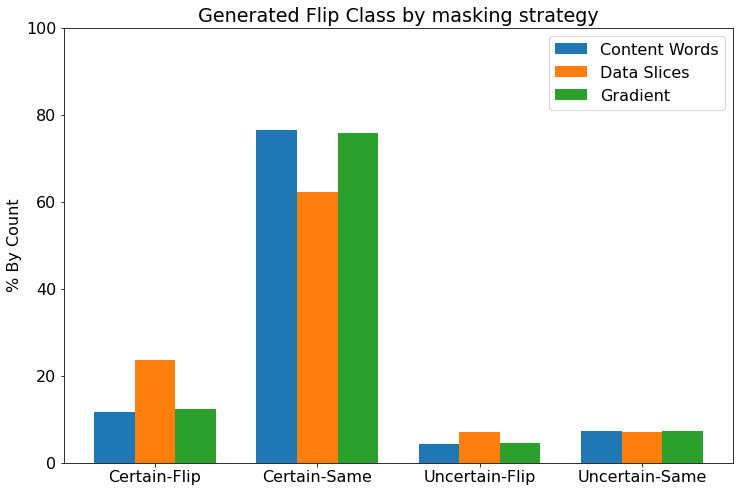

In [48]:
# visualizing flip classes without 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

width = 0.25       # the width of the bars


df = pd.read_csv('../output/MNLI/mturk/cleaned_100000_fine-tuned_content-words_gold-label_beam_MNLI_labeled.csv')
# df = pd.read_csv('./mturk/Pilot_Test_Master_92_3-3-21_labeled.csv')
df.shape

uncertains = df.loc[df['orig-label-prob'] < 0.8] # initial model uncertain
certains = df.loc[df['orig-label-prob'] > 0.8] # initial model certain
# in_slice = df.loc[df['slice'] == 1] # example contains targeted words
# out_slice = df.loc[df['slice'] == 0] # example does not contain targeted words

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

types1 = ax.bar(np.arange(len(counts)), counts, width, alpha = 1)


df = pd.read_csv('../output/MNLI/mturk/cleaned_100000_fine-tuned_data-slices_gold-label_beam_MNLI_labeled.csv')
# df = pd.read_csv('./mturk/Pilot_Test_Master_92_3-3-21_labeled.csv')
df.shape

uncertains = df.loc[df['orig-label-prob'] < 0.8] # initial model uncertain
certains = df.loc[df['orig-label-prob'] > 0.8] # initial model certain
# in_slice = df.loc[df['slice'] == 1] # example contains targeted words
# out_slice = df.loc[df['slice'] == 0] # example does not contain targeted words

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

types2 = ax.bar(np.arange(len(counts))+ width, counts, width)



df = pd.read_csv('../output/MNLI/mturk/cleaned_100000_fine-tuned_gradient_gold-label_beam_MNLI_labeled.csv')
# df = pd.read_csv('./mturk/Pilot_Test_Master_92_3-3-21_labeled.csv')
df.shape

uncertains = df.loc[df['orig-label-prob'] < 0.8] # initial model uncertain
certains = df.loc[df['orig-label-prob'] > 0.8] # initial model certain
# in_slice = df.loc[df['slice'] == 1] # example contains targeted words
# out_slice = df.loc[df['slice'] == 0] # example does not contain targeted words

counts = df['flip-class'].groupby(df['flip-class']).size()
N = sum(counts)
counts = counts/sum(counts) * 100

types3 = ax.bar(np.arange(len(counts))+ width*2, counts, width)

ax.set_ylabel('% By Count')
ax.set_title(f'Generated Flip Class by masking strategy')
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(len(counts))+width)
ax.set_xticklabels( ('Certain-Flip', 'Certain-Same', 'Uncertain-Flip', 'Uncertain-Same') )
ax.legend( (types1[0], types2[0], types3[0]), ('Content Words', 'Data Slices', 'Gradient') )


plt.savefig('flip-class-gens.png', dpi=400)

In [31]:
counts.index

Index(['Certain-Flip', 'Certain-Same', 'Uncertain-Flip', 'Uncertain-Same'], dtype='object', name='flip-class')

In [9]:
counts

flip-class
Certain-Flip      11.656064
Certain-Same      76.618856
Uncertain-Flip     4.388465
Uncertain-Same     7.336614
Name: flip-class, dtype: float64